In [1]:
import os
import sys

# Adiciona a pasta raiz do projeto ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from src.model import kfold_model, linearRegression_model, randomForest_model, save_metrics, save_model
from src.data import load_custom_csv
from src.utils import plot_regressor_model_ultils, save_plot

In [3]:
# Importando biblioteca
df = load_custom_csv("AEP_ready.csv")

In [4]:
df2 = df.copy()
df2 = df2.drop('Datetime', axis=1)
df2

,AEP_MW,year,month,day,hour,dayofweek,is_weekend
0,12379.0,2004,10,1,1,4,0
1,11935.0,2004,10,1,2,4,0
2,11692.0,2004,10,1,3,4,0
3,11597.0,2004,10,1,4,4,0
4,11681.0,2004,10,1,5,4,0
...,...,...,...,...,...,...,...
121268,17673.0,2018,8,2,20,3,0
121269,17303.0,2018,8,2,21,3,0
121270,17001.0,2018,8,2,22,3,0
121271,15964.0,2018,8,2,23,3,0


In [5]:
# Separando entrada e saída
df_input = df2.drop("AEP_MW", axis=1).copy()
df_target = df2['AEP_MW'].copy()

# Linear Regression

In [6]:
# Linear Regression
cv = kfold_model(5, 0)
linearRegression, pred, target = linearRegression_model(df_input, df_target, cv, 'r2')
metrics = print('Métrica Linear Regression')
for metric, value in linearRegression.items():
    print(f"{metric}: {value}")

Métrica Linear Regression
R2: 0.29846750645974407
MAE: 1754.416925834163
MSE: 4710996.763945858
RMSE: 2170.4830715639914


In [7]:
# Salvando métricas em reports/metrics
save_metrics(linearRegression, filename='linearRegression_metrics')

Metrics salvas em ../reports/metrics/linearRegression_metrics.json


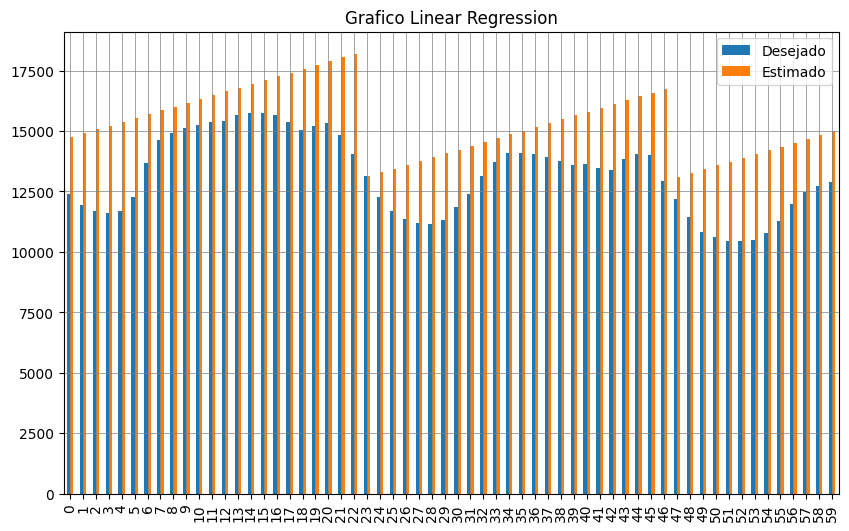

In [10]:
# Plotando gráfico de regressão
fig = plot_regressor_model_ultils(pred, target, title='Grafico Linear Regression')

In [11]:
# Salvando o plot
save_plot(fig, 'grafico_lineraRegression')

Plot salvo em ../reports/figures/grafico_lineraRegression.png


# Random Forest Regressor

In [8]:
# Random Forest
cv = kfold_model(5, 0)
randomForest, pred, target = randomForest_model(
    input=df_input,
    target=df_target,
    cv=cv,
    scoring='r2',
    random_state=0,
    verbose=False
)
for metric, value in randomForest.items():
    print(f"{metric}: {value}")

R2: 0.9950693270370193
MAE: 111.11463201482057
MSE: 33110.91729401767
RMSE: 181.96405495047003


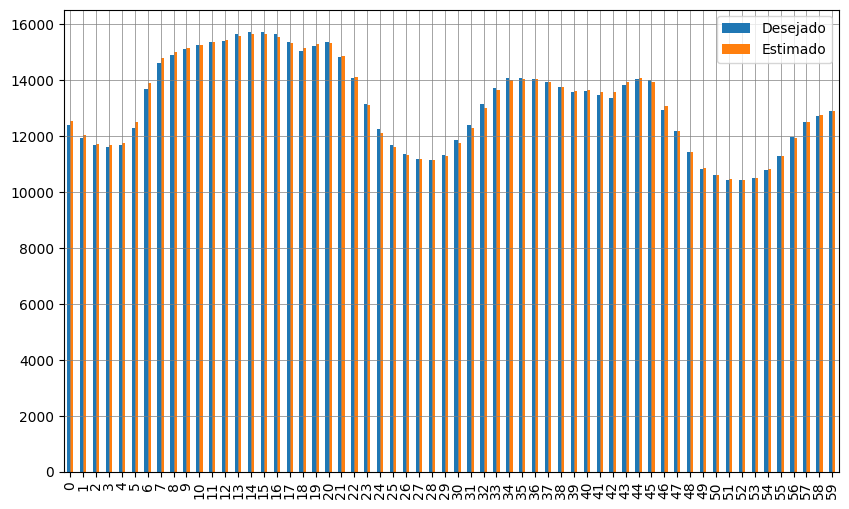

In [9]:
# Plotando gráfico de regressão
plot_regressor_model_ultils(pred, target)